# Wheat varieties prediction using ANN
## Objective: To implement artificial neural network from scratch



## Artificial neural network

Artificial neural networks are relatively crude electronic networks of neurons based on the neural structure of the brain. They process records one at a time, and learn by comparing their classification of the record (i.e., largely arbitrary) with the known actual classification of the record. The errors from the initial classification of the first record is fed back into the network, and used to modify the networks algorithm for further iterations.

A neuron in an artificial neural network is

1. A set of input values (xi) and associated weights (wi).

2. A function (g) that sums the weights and maps the results to an output (y).

### Parameters
We can choose the dimensionality (the number of nodes) of the hidden layer. The more nodes we put into the hidden layer the more complex functions we will be able fit. But higher dimensionality comes at a cost. First, more computation is required to make predictions and learn the network parameters. A bigger number of parameters also means we become more prone to overfitting our data.
How to choose the size of the hidden layer? While there are some general guidelines and recommendations, it always depends on your specific problem and is more of an art than a science. We will play with the number of nodes in the hidden layer later on and see how it affects our output.








###Activation function
We also need to pick an *activation function* for our hidden layer. The activation function transforms the inputs of the layer into its outputs. A nonlinear activation function is what allows us to fit nonlinear hypotheses. Common chocies for activation functions are [tanh](https://reference.wolfram.com/language/ref/Tanh.html), the [sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function), or [ReLUs](https://en.wikipedia.org/wiki/Rectifier_(neural_networks). 


Learning the parameters for our network means finding parameters ($W_1, b_1, W_2, b_2$) that minimize the error on our training data. But how do we define the error? We call the function that measures our error the *loss function*. A common choice with the softmax output is the [cross-entropy loss](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_error_function_and_logistic_regression). If we have $N$ training examples and $C$ classes then the loss for our prediction $\hat{y}$ with respect to the true labels $y$ is given by:

$$
\begin{aligned}
L(y,\hat{y}) = - \frac{1}{N} \sum_{n \in N} \sum_{i \in C} y_{n,i} \log\hat{y}_{n,i}
\end{aligned}
$$

Remember that our goal is to find the parameters that minimize our loss function. We can use [gradient descent](http://cs231n.github.io/optimization-1/) to find its minimum. I will implement the most vanilla version of gradient descent, also called batch gradient descent with a fixed learning rate. Variations such as SGD (stochastic gradient descent) or minibatch gradient descent typically perform better in practice. So if you are serious you'll want to use one of these, and ideally you would also [decay the learning rate over time](http://cs231n.github.io/neural-networks-3/#anneal).

### Gradient descent
As an input, gradient descent needs the gradients (vector of derivatives) of the loss function with respect to our parameters: $\frac{\partial{L}}{\partial{W_1}}$, $\frac{\partial{L}}{\partial{b_1}}$, $\frac{\partial{L}}{\partial{W_2}}$, $\frac{\partial{L}}{\partial{b_2}}$. To calculate these gradients we use the famous *backpropagation algorithm*, which is a way to efficiently calculate the gradients starting from the output. I won't go into detail how backpropagation works, but there are many excellent explanations ([here](http://colah.github.io/posts/2015-08-Backprop/) or [here](http://cs231n.github.io/optimization-2/)) floating around the web.

### Backpropagation formula
Applying the backpropagation formula we find the following:

$$
\begin{aligned}
& \delta_3 = \hat{y} - y \\
& \delta_2 = (1 - \tanh^2z_1) \circ \delta_3W_2^T \\
& \frac{\partial{L}}{\partial{W_2}} = a_1^T \delta_3  \\
& \frac{\partial{L}}{\partial{b_2}} = \delta_3\\
& \frac{\partial{L}}{\partial{W_1}} = x^T \delta_2\\
& \frac{\partial{L}}{\partial{b_1}} = \delta_2 \\
\end{aligned}
$$

## Dataset
Measurements of geometrical properties of kernels belonging to three different varieties of wheat. A soft X-ray technique and GRAINS package were used to construct all seven, real-valued attributes.

## Attributes
1.	area A,
2.	perimeter P,
3.	compactness C = 4*pi*A/P^2,
4.	length of kernel,
5.	width of kernel,
6.	asymmetry coefficient
7.	length of kernel groove.

## Target Class
Varieties of wheat: Kama, Rosa and Canadian.

## Source: https://www.kaggle.com/rwzhang/seeds-dataset



## Task 1: Implement Artificial Neural Networks from Scratch
1.	Obtain the seeds dataset
2.	Apply pre-processing techniques (if any)
3.	Divide dataset into training (70%) and testing (30%) set, respectively.
4.	Implement Artificial Neural Networks from Scratch
5.	Train your neural model from scratch
6.	Evaluate the training and testing accuracy of your own model

## Task 2: Implement SKLEARN’s Artificial Neural Networks
1.	Obtain the seeds dataset
2.	Apply pre-processing techniques (if any)
3.	Divide dataset into training (70%) and testing (30%) set, respectively.
4.	Implement Artificial Neural Networks using SKLEARN’s library
5.	Train SKLEARN’s neural model 
6.	Evaluate the training and testing accuracy of SKLEARN’s model

# Task 3: Play with hyper-parameters
1.	Use SKLEARN’s neural model
2.	Evaluate the impact of various hyper-parameters of neural networks
3.	Plot the results
4.	Conclude the experiments by showing the impact of hyper-parameters on neural network

###Helpful links: 
https://machinelearningmastery.com/implement-backpropagation-algorithm-scratch-python/
https://medium.com/towards-artificial-intelligence/building-neural-networks-from-scratch-with-python-code-and-math-in-detail-i-536fae5d7bbf
https://stackabuse.com/creating-a-neural-network-from-scratch-in-python-multi-class-classification/
http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/

# Additonal work (not considered in evaluation)
Instead of batch gradient descent, use minibatch gradient descent ([more info](http://cs231n.github.io/optimization-1/#gd))

Use various activation functions

##Task 1: Implement Artificial Neural Networks from Scratch


In [6]:
# Load the libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [21]:
# Load the dataset 
# Using Diabetes Dataset for Training and Testing
data = pd.read_csv('diabetes_data.csv')

In [22]:
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [23]:
data['class'].value_counts()

Positive    320
Negative    200
Name: class, dtype: int64

In [24]:
# Preprocessing
# Encoding categorical variables (if any)
# Feature Scaling
# Filling missing values (if any)
data.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [25]:
LE = preprocessing.LabelEncoder()
CateList = data.select_dtypes(exclude="int64").columns
print(CateList)

Index(['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
       'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')


In [26]:
for i in CateList:
    data[i] = LE.fit_transform(data[i])

In [27]:
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [28]:
df = data.iloc[:,:-1]
mm = MinMaxScaler()
df[:]= mm.fit_transform(df[:])

In [29]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,0.324324,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
1,0.567568,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.337838,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.391892,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.594595,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [30]:
# Divide the dataset to training (70 %) and testing set (30 %)
X = df.values
y = data['class']
print(X.shape, y.shape)

(520, 16) (520,)


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 123)

In [33]:
# ANN Code from Scratch
# Activation Functions

def tanh(x, derivative=False):
    if derivative:
        1-x**2
    return np.tanh(x)

def sigmoid(x, derivative=False):
    if derivative:
        return x*(1-x)
    return 1/(1+np.exp(-x))

def mse(y_pred, y, derivative=False):
    if derivative:
        return y_pred*(y_pred-y)
    return 0.5*(y_pred-y)**2

In [34]:
# Layers
class Layer:
    def __init__(self, weights_shape, previous_result=None):
        self.previous_result = previous_result
        self.weights = self.init_weights(weights_shape)
        self.out = None
        self.bias = np.random.uniform(-1,1)
        
    def init_weights(self, weights_shape):
        return np.random.uniform(-1,1, weights_shape)
    
    def compute_output(self, previous_result, activation_function):
        self.previous_result = previous_result
        self.out = activation_function(self.previous_result.dot(self.weights) + self.bias)

In [35]:
class ANN:
    def __init__(self, input_values, output_values, learning_rate=1e-1, activation_function=sigmoid):
        self.input_values = input_values
        self.layers = []
        self.output_values = output_values
        self.lr = learning_rate
        self.activation_function = activation_function
            
    def add_layer(self, nb_nodes):
        if len(self.layers)==0:
            weights_shape = (self.input_values.shape[1], nb_nodes)
            previous_result = self.input_values
            layer = Layer(weights_shape, previous_result)
        else:
            weights_shape = (self.layers[-1].weights.shape[1], nb_nodes)
            layer = Layer(weights_shape, self.layers[-1].out)
        self.layers.append(layer)
        
    def feed_forward(self):
        previous_result = self.layers[0].previous_result
        for layer in self.layers:
            layer.compute_output(previous_result, self.activation_function)
            previous_result = layer.out
    
    def back_prop(self):
        previous_layer = last_layer = self.layers[-1]
        d = mse(last_layer.out, self.output_values, True) * self.activation_function(last_layer.out, True)
        last_layer.weights -= self.lr * last_layer.previous_result.T.dot(d)
        last_layer.bias -= self.lr * np.mean(d)
        for layer in np.flip(self.layers, axis=0)[1:]:
            d = d.dot(previous_layer.weights.T) * self.activation_function(layer.out, True)
            layer.weights -= self.lr * layer.previous_result.T.dot(d)
            layer.bias -= self.lr * np.mean(d)
            previous_layer = layer
        
    def train(self, nb_epochs=65000):
        self.layers = np.array(self.layers)
        error_list = []
        for i in range(nb_epochs):
            self.feed_forward()
            self.back_prop()
            error_list.append(np.mean(mse(self.layers[-1].out, self.output_values)))
        return error_list

    def predict(self, input_values):
        previous_result = np.array(input_values)
        for layer in self.layers:
            layer.compute_output(previous_result, self.activation_function)
            previous_result = layer.out
        return previous_result

In [38]:
# Train your own ANN model
ann = ANN(X_train, y_train, learning_rate=1e-1, activation_function=sigmoid)
ann.add_layer(3)
ann.add_layer(1)

In [46]:
# Test your own ANN model and evaluate performance in terms of accuracy
pred = np.around(ann.predict(X_test))
pred1 = np.around(ann.predict(X_train))

In [47]:
acc = accuracy_score(y_test, pred)
acc1 = accuracy_score(y_train, pred1)

In [48]:
print("Training Accuracy: ",acc1)
print("Testing Accuracy: ",acc)

Training Accuracy:  0.8691208791208791
Testing Accuracy:  0.6974358974358974


##Task 2: Implement SKLEARN’s Artificial Neural Networks

In [49]:
# Obtain the training and testing set
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(364, 16) (364,)
(156, 16) (156,)


In [51]:
from sklearn.neural_network import MLPClassifier

In [53]:
# Build SKLEARN's ANN model
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
clf.predict_proba(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


array([[4.21015711e-06, 9.99995790e-01],
       [8.62896088e-01, 1.37103912e-01],
       [9.97198554e-01, 2.80144551e-03],
       [8.01181711e-03, 9.91988183e-01],
       [9.98672871e-01, 1.32712942e-03],
       [9.47255653e-01, 5.27443475e-02],
       [8.01181711e-03, 9.91988183e-01],
       [2.41328006e-01, 7.58671994e-01],
       [3.68915933e-04, 9.99631084e-01],
       [9.98672871e-01, 1.32712942e-03],
       [9.37194033e-04, 9.99062806e-01],
       [3.97742200e-06, 9.99996023e-01],
       [6.71368141e-06, 9.99993286e-01],
       [4.92665725e-04, 9.99507334e-01],
       [9.93465915e-01, 6.53408535e-03],
       [1.41274601e-02, 9.85872540e-01],
       [5.11365200e-03, 9.94886348e-01],
       [6.71368141e-06, 9.99993286e-01],
       [9.84723227e-01, 1.52767730e-02],
       [1.33940870e-03, 9.98660591e-01],
       [9.92901965e-01, 7.09803499e-03],
       [1.52431595e-05, 9.99984757e-01],
       [9.82331586e-01, 1.76684138e-02],
       [3.61224763e-06, 9.99996388e-01],
       [1.759836

In [54]:
clf.score(X_test, y_test)

0.9487179487179487

# Task 3: Play with hyper-parameters


1.	Use SKLEARN’s neural model
2.	Evaluate the impact of various hyper-parameters of neural networks
3.	Plot the results
4.	Conclude the experiments by showing the impact of hyper-parameters on neural network

In [122]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
print('Training Accuracy', clf.score(X_train, y_train))
print('Testing Accuracy', clf.score(X_test, y_test))

Training Accuracy 0.9835164835164835
Testing Accuracy 0.9487179487179487


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [110]:
train, test = [],[]
for i in [50,100,150,200,250,300]:
  clf = MLPClassifier(random_state=1, max_iter=i).fit(X_train, y_train)
  train.append(clf.score(X_train, y_train))
  test.append(clf.score(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/

In [111]:
train

[0.9340659340659341,
 0.9532967032967034,
 0.9615384615384616,
 0.967032967032967,
 0.9752747252747253,
 0.9835164835164835]

In [112]:
test

[0.8974358974358975,
 0.9358974358974359,
 0.9358974358974359,
 0.9358974358974359,
 0.9487179487179487,
 0.9487179487179487]

In [113]:
atrain, atest = [],[]
for i in [0.1,0.01,0.001,0.0001]:
  clf = MLPClassifier(random_state=1, max_iter=100, alpha=i).fit(X_train, y_train)
  atrain.append(clf.score(X_train, y_train))
  atest.append(clf.score(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [114]:
actrain, actest = [],[]
for i in ['relu', 'identity', 'logistic', 'tanh']:
  clf = MLPClassifier(random_state=1, max_iter=100, activation=i).fit(X_train, y_train)
  actrain.append(clf.score(X_train, y_train))
  actest.append(clf.score(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [115]:
btrain, btest = [],[]
for i in [10, 25, 50, 100, 150, 200]:
  clf = MLPClassifier(random_state=1, max_iter=100, batch_size=i).fit(X_train, y_train)
  btrain.append(clf.score(X_train, y_train))
  btest.append(clf.score(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [116]:
import matplotlib.pyplot as plt 

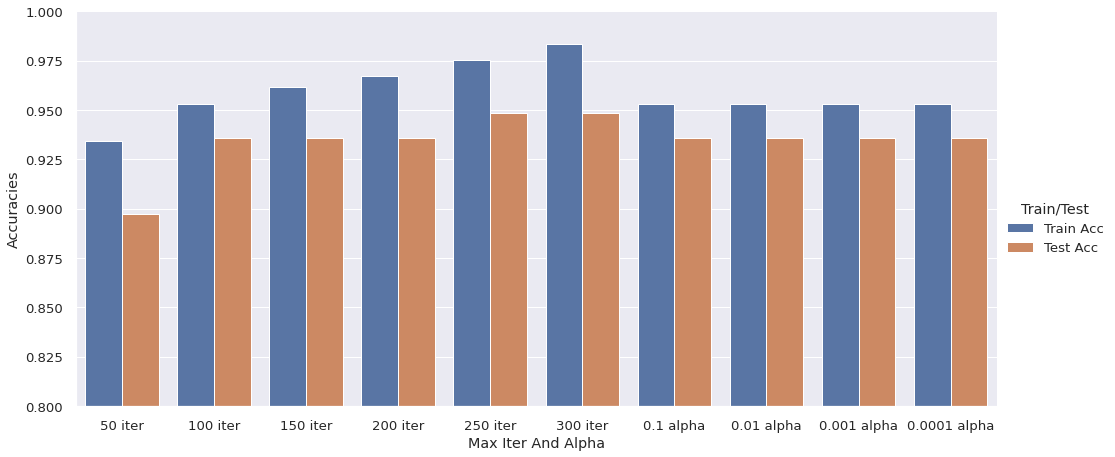

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

a = [50,100,150,200,250,300]
b = [0.1,0.01,0.001,0.0001]
c = ['relu', 'identity', 'logistic', 'tanh']
d = [10, 25, 50, 100, 150, 200]

plt.style.use('seaborn')
a=[str(i) for i in a]
b=[str(i) for i in b]
c=[str(i) for i in c]
d=[str(i) for i in d]
sns.set(font_scale=1.2)
data={'Max Iter And Alpha':[str(i)+" iter" for i in a]+[str(i)+" alpha" for i in b]
      ,'Train Acc':train+atrain
      ,'Test Acc':test+atest}
df=pd.DataFrame(data)
df = pd.melt(df, id_vars="Max Iter And Alpha", var_name="Train/Test", value_name="Accuracies")
nls=sns.catplot(x='Max Iter And Alpha', y='Accuracies', hue='Train/Test', 
            data=df, kind='bar',height=6.27, aspect=13.7/6.27)
nls.set(ylim=(0.8,1))

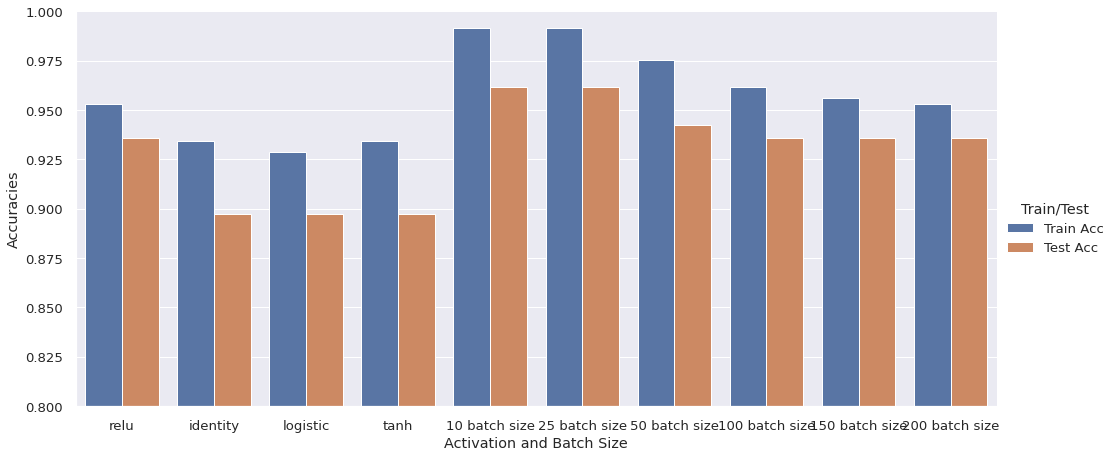

In [120]:
plt.style.use('seaborn')
sns.set(font_scale=1.2)
data={'Activation and Batch Size':[str(i) for i in c]+[str(i)+" batch size" for i in d]
      ,'Train Acc':actrain+btrain
      ,'Test Acc':actest+btest}
df=pd.DataFrame(data)
df = pd.melt(df, id_vars="Activation and Batch Size", var_name="Train/Test", value_name="Accuracies")
nls=sns.catplot(x='Activation and Batch Size', y='Accuracies', hue='Train/Test', 
            data=df, kind='bar',height=6.27, aspect=13.7/6.27)
nls.set(ylim=(0.8,1))

# Concluding Remarks

## Sklearn vs Model from Scratch
#### It is clear that Sklearn's Model is performing better than the model implemented from scratch. Also, I believe that the Sklearn's implementation is optimized and doing well in terms of time and space complexity as its execution time is pretty low when compared to my model. Also, Sklearn library's implementation is quite popular. It has been examined, tested, debugged, and updated by the members of the community, so the likelihood of hidden errors is decreased and the approaches to the algorithm have been optimized with a greater accuracy.

## Playing with Hyperparameters
####  We can see that setting Hyperparameters play a crucial role in determining the accuracy of the predictions. 
#### We can observe that the Max Iter size of 300 performed very well. The change of the value of Alpha made negligible difference in accuracies of both Training and Testing. Relu activation function performed well in comparison to the other ones.Coming to batch size, the batch size of 10 and 25 performed well wrt to others.